## Loan Prediction System

In [51]:
#Importing Libraries
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [52]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [53]:
test=pd.read_csv("data_set/test.csv")
train=pd.read_csv("data_set/train.csv")

In [54]:
X=test.iloc[:, :11]
y=test.iloc[:,-1]
print (train.shape, test.shape)

(614, 13) (367, 12)


In [55]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,432826,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,339142,111592.0,9472,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,222000,0.0,4884,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,191142,174492.0,8880,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,444000,0.0,10434,360.0,1.0,Urban,Y


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [57]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,614.000000,600.00000,564.000000
mean,3.998560e+05,1.199722e+05,10446.293160,342.00000,0.842199
std,4.520691e+05,2.165424e+05,6537.206648,65.12041,0.364878
min,1.110000e+04,0.000000e+00,0.000000,12.00000,0.000000
25%,2.129350e+05,0.000000e+00,7252.000000,360.00000,1.000000
50%,2.821250e+05,8.794900e+04,9250.000000,360.00000,1.000000
75%,4.288300e+05,1.699965e+05,12191.500000,360.00000,1.000000
max,5.994000e+06,3.083358e+06,51800.000000,480.00000,1.000000


In [58]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,423280,0,8140,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,227624,111000,9324,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,370000,133200,15392,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,173160,188404,7400,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,242424,0,5772,360.0,1.0,Urban


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    int64  
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 34.5+ KB


In [61]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,3.670000e+02,3.670000e+02,367.000000,361.000000,338.000000
mean,3.556144e+05,1.161487e+05,9936.566757,342.537396,0.825444
std,3.633907e+05,1.727332e+05,4659.145500,65.156643,0.380150
min,0.000000e+00,0.000000e+00,0.000000,6.000000,0.000000
25%,2.119360e+05,0.000000e+00,7400.000000,360.000000,1.000000
50%,2.801640e+05,7.585000e+04,9250.000000,360.000000,1.000000
75%,3.744400e+05,1.798570e+05,11655.000000,360.000000,1.000000
max,5.367146e+06,1.776000e+06,40700.000000,480.000000,1.000000


In [62]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [63]:
# Data Visualization and Preparation

data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())



Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

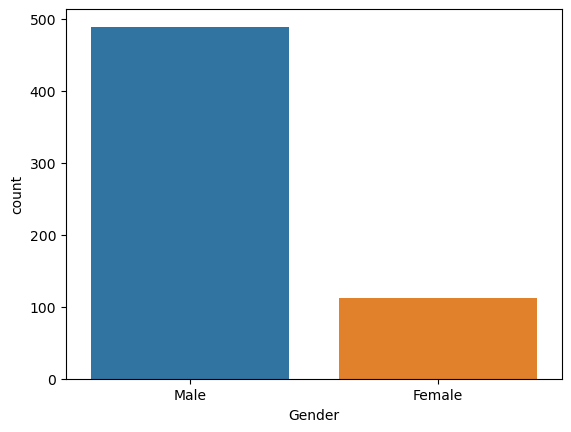

In [64]:
# Gender
sns.countplot(train['Gender'])

In [65]:
pd.crosstab(train.Gender, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [66]:
train.Gender = train.Gender.fillna(train.Gender.mode())
test.Gender = test.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


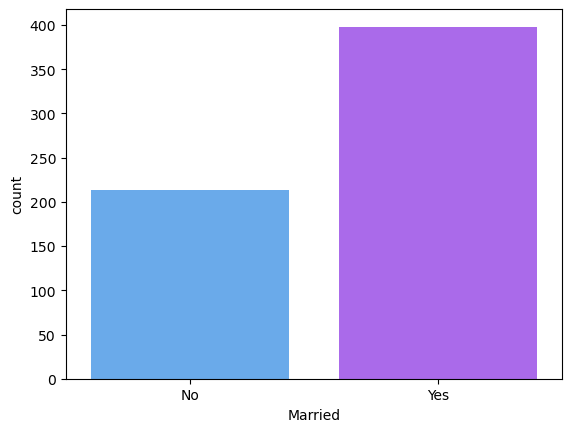

In [67]:
# Married
sns.countplot(train.Married, palette ='cool')
# In[16]:
pd.crosstab(train.Married , train.Loan_Status,margins = True)

In [68]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)
# Filling the empty rows in Married Attribute with the mode values.

In [69]:
# Dependants
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

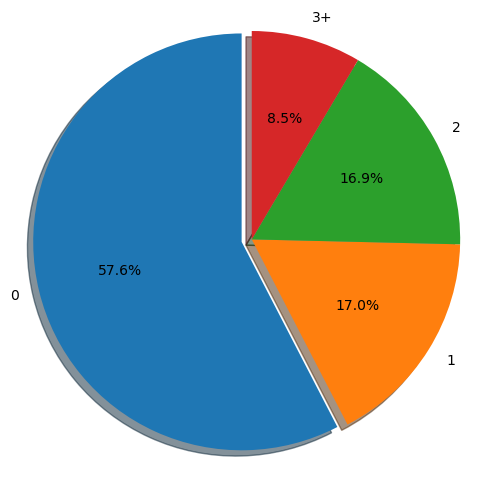

In [70]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [71]:
pd.crosstab(train.Dependents , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


In [72]:
test.Dependents = test.Dependents.fillna("0")
train.Dependents = train.Dependents.fillna("0")
rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}
train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)
# We observe that more than half the applicants have no dependents. The number of dependents doesnt have a huge impact on loan processing as the success ratio for all is nearly the same. Further, 
# the data is cleaned with 3+ dependents replaced as 3, for simplicity in training the model

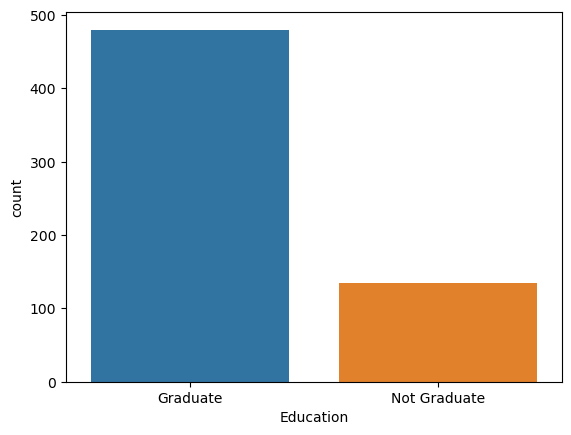

In [73]:
# Education
sns.countplot(train.Education)
# In[23]:
pd.crosstab(train.Education , train.Loan_Status,margins = True)
# In[24]:
train['Education'] = train['Education'].map( {'Not Graduate': 0, 'Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Not Graduate': 0, 'Graduate': 1} ).astype(int)
# More number of graduates are getting credit sanctioned. We have binarized the education data to 0 and 1 for simplicity in working

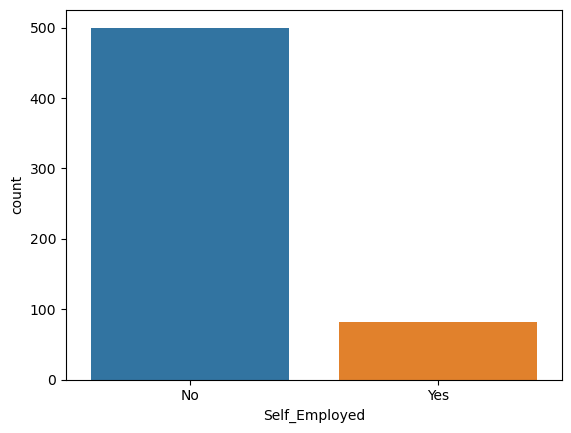

In [74]:
# Self Employed
sns.countplot(train['Self_Employed'])
# In[26]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)
# In[27]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())
self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)
# Mostly, people are employed to some organizations. Less people have their own business. The null values are filled. Get_dummies function is used to fill data as no= 0 and yes= 1


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

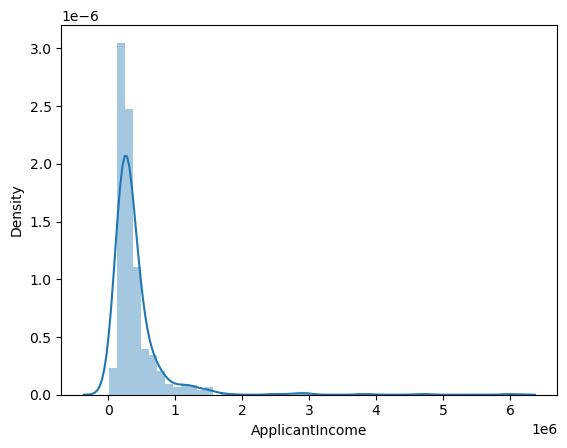

In [75]:
# Applicant Income
sns.distplot(train['ApplicantIncome'])
# Income range is mostly in 0-10,000 bracket

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

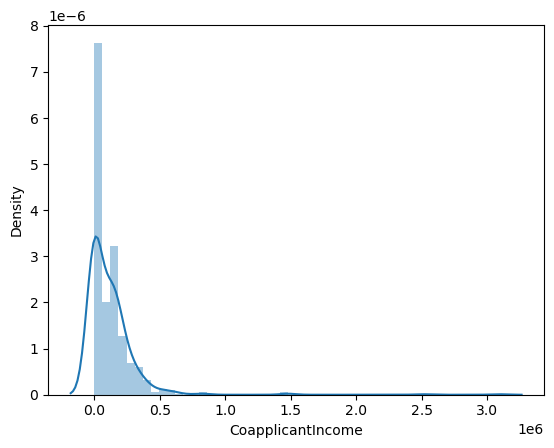

In [76]:
# Co-Applicant income
sns.distplot(train['CoapplicantIncome'])
# Co-applicant income is mainly, half of main income range bracket

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

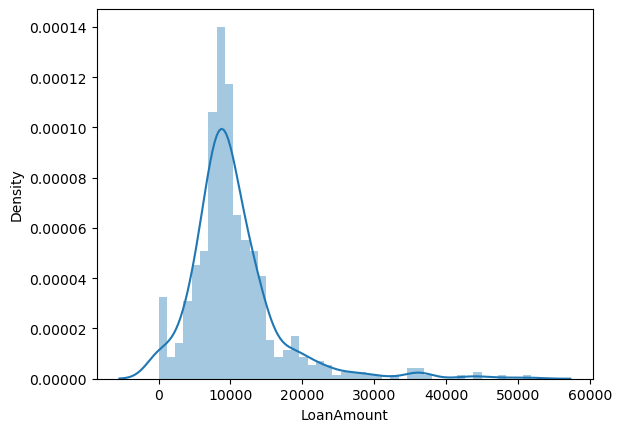

In [77]:
# Loan Amount
train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)
# In[31]:
sns.distplot(train['LoanAmount'])
# We have filled null values with mean calculated.

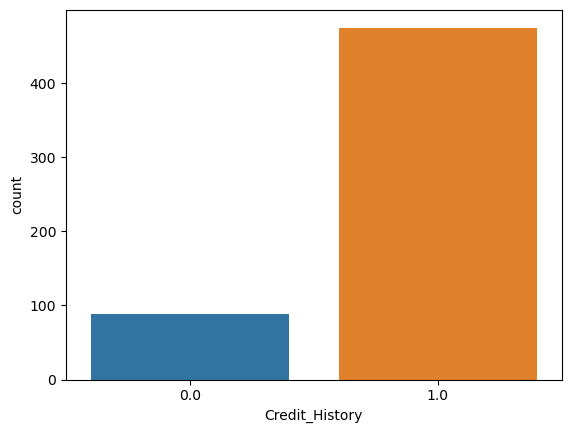

In [78]:
# Credit History
sns.countplot(train['Credit_History'])
# In[33]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)
# In[34]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])
# We observe credit history as being the major criteria for loan processing. It is observed that applicants having credit history = 1 or true previously, have a very high chance to get new credit. Success being close to 80%. While first timers have chance of only 7.8%, to get loan granted.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

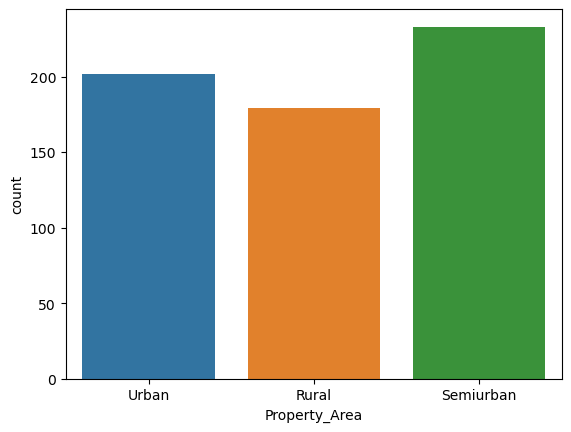

In [79]:
# Property Area
sns.countplot(train.Property_Area)

In [80]:
train['Property_Area'] = train['Property_Area'].map( {'Rural': 0, 'Semiurban': 1 ,'Urban': 2  } ).astype(int)
test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Rural': 0, 'Semiurban': 1 ,'Urban': 2  } ).astype(int)

In [81]:
pd.crosstab(train.Property_Area , train.Loan_Status, margins = True)
# It is observed that semi-urban people have the highest approval rate at 76%. Rural applicants have lower chance. 
# The property area tags are relabelled for simplicity in working forward 

Loan_Status,N,Y,All
Property_Area,,,
0,69,110,179
1,54,179,233
2,69,133,202
All,192,422,614


In [82]:
# Identifying target variable = Loan Status
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)
# Loan approval status' are assigned as no=0 and yes=1 for the training dataset 

In [83]:
# Dropping the ID column
train.drop(['Loan_ID'], axis = 1 , inplace =True)

In [84]:
# Viewing the datasets
train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,married_Yes,employed_Yes
0,0,1,432826,0.0,0,1.0,2,1,1,0,0
1,1,1,339142,111592.0,9472,1.0,0,0,1,1,0
2,0,1,222000,0.0,4884,1.0,2,1,1,1,1
3,0,0,191142,174492.0,8880,1.0,2,1,1,1,0
4,0,1,444000,0.0,10434,1.0,2,1,1,0,0


In [85]:
test.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,married_Yes,employed_Yes
0,LP001015,0,1,423280,0,8140,1.0,2,1,1,0
1,LP001022,1,1,227624,111000,9324,1.0,2,1,1,0
2,LP001031,2,1,370000,133200,15392,1.0,2,1,1,0
3,LP001035,2,1,173160,188404,7400,1.0,2,1,1,0
4,LP001051,0,0,242424,0,5772,1.0,2,1,0,0


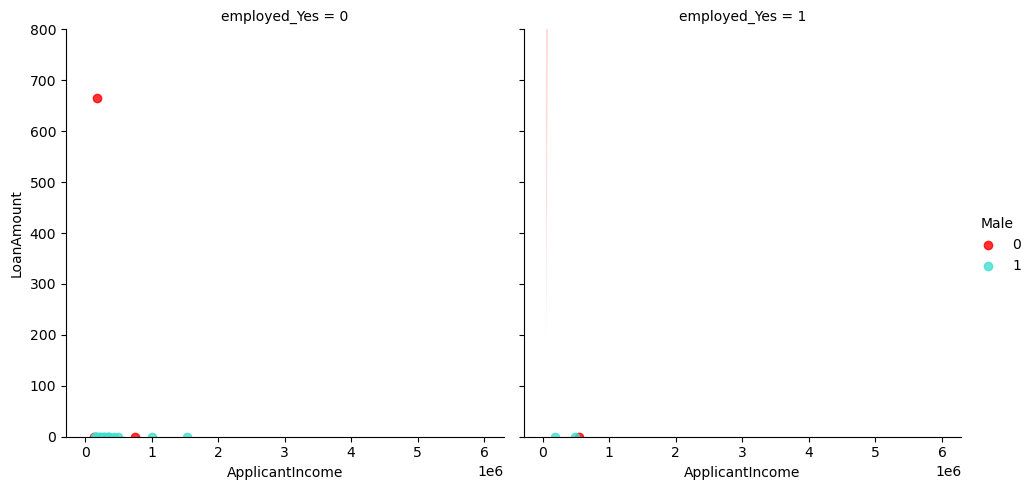

In [86]:
# ### Correlation Analysis
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train , col='employed_Yes', hue='Male',
          palette= ["red" , "turquoise","Yellow"] ,aspect=1,size=5)
g.set(ylim=(0, 800))
# Relation Between the Male or female Applicant's income , Loan taken and Self employment.

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

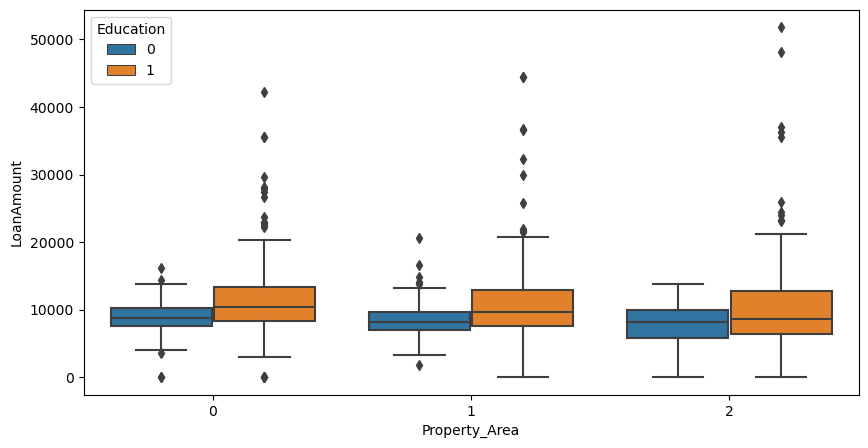

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=train)
# Further we analyse the relation between education status,loan taken and property area

In [88]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

In [89]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

69.72972972972973

In [90]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

61.08108108108108

In [91]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

70.27027027027027

In [92]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

70.27027027027027

In [93]:
dtc = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=50, learning_rate=1)
abc.fit(X_train, y_train)
pred_abc = abc.predict(X_test)
acc_abc = accuracy_score(y_test , pred_abc)*100
acc_abc

72.43243243243244

In [103]:
# Create combined Model Random Forest with Logisitc regression
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
lr_pred = logmodel.predict(X_test)
rf_pred = rf.predict(X_test)
combined_pred = []
for i in range(len(X_test)):
    if lr_pred[i] == rf_pred[i]:
        combined_pred.append(lr_pred[i])
    else:
        combined_pred.append(rf_pred[i])
acc_combined = accuracy_score(y_test ,combined_pred)*100
acc_combined

80.54054054054053

In [110]:
# Arranging the Accuracy results

models = pd.DataFrame({
    'Model': ['Logistic Regression','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Combined-Method'],
    'Score': [acc_l  , acc_knn , acc_gb ,acc_svm ,acc_combined ]})
models.sort_values(by='Score')

,Model,Score
1,K- Nearest Neighbour,61.081081
0,Logistic Regression,69.729730
2,Naive Bayes,70.270270
3,SVM,70.270270
4,Combined-Method,80.540541


In [111]:
# Let us check the feature importance,
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Credit_History,0.246
LoanAmount,0.222
ApplicantIncome,0.213
CoapplicantIncome,0.115
Property_Area,0.054
Dependents,0.053
married_Yes,0.027
Male,0.026
Education,0.025


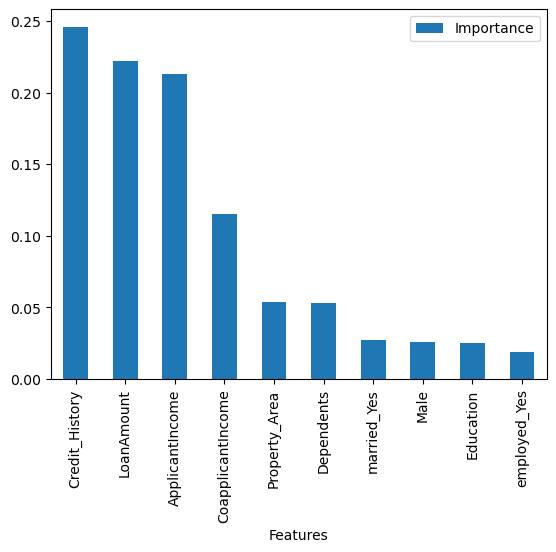

In [112]:
importances.plot.bar()
pickle.dump(logmodel, open('loan.pkl','wb'))
model = pickle.load(open('loan.pkl','rb'))